<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/freezing_in_LNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Calculation of freezing point in LNG
#@markdown Demonstration of calculations of freezing points in LNG processing
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

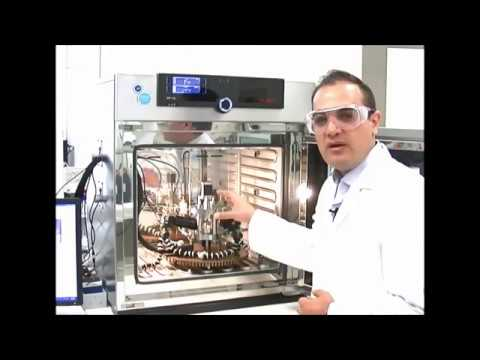

In [2]:
#@title Introduction to freezing in LNG
#@markdown This video gives an intriduction to freezing of CO2 in LNG processing
from IPython.display import YouTubeVideo
YouTubeVideo('RvoeLXCaSig', width=600, height=400)

# Calculation off freezing point in LNG

In the following example we use PR/SRK to claculate the freezing point in an LNG mixture

triple point temperature  90.69 [K] and pressure  0.116656057 [bara]
critical temperature  190.55999999999997 [K] and pressure  45.99 [bara]


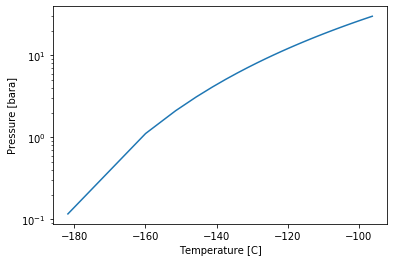

In [3]:
camponentName = "methane" #@param ["ethane", "CO2"]
eos = "srk" #@param ["srk", "pr"]
fluid1 = fluid(eos) #create a fluid using the SRK-EoS
fluid1.addComponent(camponentName, 1.0) #adding 1 mole methane to the fluid

TTrip = fluid1.getPhase(0).getComponent(camponentName).getTriplePointTemperature()
PTrip = fluid1.getPhase(0).getComponent(camponentName).getTriplePointPressure()
Tcritical = fluid1.getPhase(0).getComponent(camponentName).getTC()
Pcritical = fluid1.getPhase(0).getComponent(camponentName).getPC()

fluid1.setTemperature(TTrip)
fluid1.setPressure(PTrip)
print('triple point temperature ', TTrip, "[K] and pressure ", PTrip, "[bara]")
print('critical temperature ', Tcritical, "[K] and pressure ", Pcritical, "[bara]")

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(PTrip, Pcritical-15.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure);
plt.yscale('log')
plt.xlabel('Temperature [C]');
plt.ylabel('Pressure [bara]');

# A TPflash with mercury

Calculate the composition of a fluid including mercury

In [4]:
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
temperature = 55.0   #@param {type:"number"}
pressure = 10.0 #@param {type:"number"}


# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) 
fluid1.addComponent('mercury', 1.0)
fluid1.setTemperature(temperature)
fluid1.setPressure(pressure)
fluid1.setMultiPhaseCheck(True)

fluid1.setTemperature(temperature+273.15)
fluid1.setPressure(pressure)
TPflash(fluid1)
fluid1.initPhysicalProperties()
print('mercury in ', fluid1.getPhase(0).getPhaseTypeName(), ' ',fluid1.getPhase(0).getComponent(0).getComponentName(), ' ', fluid1.getPhase(0).getComponent('mercury').getx())

mercury in  gas   methane   7.573992808703628e-07
